In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf 
import csv


In [6]:
df = pd.read_csv('/content/abalone.csv')

In [8]:
with open('/content/abalone.csv') as csvfile:
  csvreader = csv.reader(csvfile)
  next(csvreader)

  rows = []
  for row in csvreader: #파일의 한줄 한줄 의 데이터 읽어 오기 
    rows.append(row)

In [9]:
input_cnt = 10 
output_cnt = 1
data = np.zeros([len(rows),input_cnt+output_cnt]) # rows 길이가 행 기존의 8 개였던 열중에 한개가 one_hot_vector 였기 때문에 1개-> 3 개로 늘려줘야 한다

print(data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [14]:
for i,row in enumerate(rows):
  if row[0] == 'M':
    data[i,0] = 1
  if row[1] == 'W':
    data[i,1] = 1
  if row[2] == 'I':
    data[i,2] = 1
  data[i,3:] = row[1:]

print(data)

[[ 1.      0.      0.     ...  0.101   0.15   15.    ]
 [ 1.      0.      0.     ...  0.0485  0.07    7.    ]
 [ 0.      0.      0.     ...  0.1415  0.21    9.    ]
 ...
 [ 1.      0.      0.     ...  0.2875  0.308   9.    ]
 [ 0.      0.      0.     ...  0.261   0.296  10.    ]
 [ 1.      0.      0.     ...  0.3765  0.495  12.    ]]


In [17]:
#train_test_split
train_ratio = 0.8

train_index = int(train_ratio * data.shape[0])
print(train_index)

3341


In [19]:
shuffle_map = np.arange(data.shape[0]) #배치 행만 큼 셔플 하기 위해서 시행 
np.random.shuffle(shuffle_map)
print(shuffle_map)

[4168 1207  393 ... 3382  611 2591]


In [22]:
train_data = data[shuffle_map[:train_index]]
test_data = data[shuffle_map[train_index:]]

print(train_data.shape)
print(test_data.shape)

(3341, 11)
(836, 11)


In [23]:
#train_test_split
train_x,train_y = train_data[:,:-output_cnt] ,train_data[:,-output_cnt:]
test_x,test_y = test_data[:,:-output_cnt],test_data[:,-output_cnt:]

print(train_x.shape)
print(train_y.shape)

print(test_x.shape)
print(test_y.shape)



(3341, 10)
(3341, 1)
(836, 10)
(836, 1)


In [26]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = 1,
                                                   input_shape = (10,)) #맨처음에 input_shape x데이터의 종속변수 수와 동일 
                            
])



In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07),loss = 'mse')

In [28]:
hisotory = model.fit(train_x,train_y,epochs = 200,batch_size=32,validation_split=0.2,callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5))
'''
validation_split = 0.2  -> 검증 데이터의 비율을 작성 하는 것이다.
callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 5)
 = 학습 도중에 검증 데이터 셋을 보면서(monitor = 'val_loss') patience = 5 번이상 값이 안좋아지면 
 학습 셋과 의 차이가 커지면  = 조기 종료 시킨다.
'''


Epoch 1/200
84/84 [==============================] - 1s 3ms/step - loss: 24.4775 - val_loss: 9.8229
Epoch 2/200
84/84 [==============================] - 0s 2ms/step - loss: 8.0754 - val_loss: 8.6800
Epoch 3/200
84/84 [==============================] - 0s 1ms/step - loss: 7.2078 - val_loss: 8.1436
Epoch 4/200
84/84 [==============================] - 0s 1ms/step - loss: 6.7868 - val_loss: 7.7337
Epoch 5/200
84/84 [==============================] - 0s 1ms/step - loss: 6.5904 - val_loss: 7.5498
Epoch 6/200
84/84 [==============================] - 0s 1ms/step - loss: 6.4455 - val_loss: 7.5537
Epoch 7/200
84/84 [==============================] - 0s 2ms/step - loss: 6.3143 - val_loss: 7.2609
Epoch 8/200
84/84 [==============================] - 0s 2ms/step - loss: 6.1990 - val_loss: 7.0937
Epoch 9/200
84/84 [==============================] - 0s 2ms/step - loss: 6.0791 - val_loss: 6.9521
Epoch 10/200
84/84 [==============================] - 0s 3ms/step - loss: 5.9755 - val_loss: 6.7809
Epoch 11

"\nvalidation_split = 0.2  -> 검증 데이터의 비율을 작성 하는 것이다.\ncallbacks = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 5)\n = 학습 도중에 검증 데이터 셋을 보면서(monitor = 'val_loss') patience = 5 번이상 값이 안좋아지면 \n 학습 셋과 의 차이가 커지면  = 조기 종료 시킨다.\n"

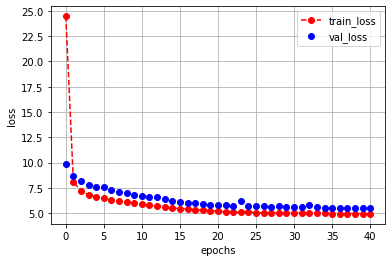

In [30]:
plt.plot(hisotory.history['loss'],'--o',color = 'red',label = 'train_loss')
plt.plot(hisotory.history['val_loss'],'o',color = 'blue',label = 'val_loss')
plt.grid()
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [31]:
model.evaluate(test_x,test_y)

27/27 [==============================] - 0s 970us/step - loss: 4.8722


4.872166633605957

In [32]:
pred_y = model.predict(test_x)

In [33]:
print(pred_y)

[[11.707472 ]
 [ 5.6264973]
 [ 7.383337 ]
 [ 9.776251 ]
 [11.204731 ]
 [ 7.362385 ]
 [11.545593 ]
 [10.035    ]
 [ 9.29603  ]
 [ 9.56128  ]
 [ 6.141001 ]
 [10.740699 ]
 [ 9.179641 ]
 [11.549206 ]
 [ 9.694342 ]
 [10.765942 ]
 [15.161554 ]
 [10.710097 ]
 [11.51065  ]
 [ 7.9969673]
 [10.470297 ]
 [10.23713  ]
 [ 8.117789 ]
 [16.349632 ]
 [ 8.162945 ]
 [ 9.009248 ]
 [11.59375  ]
 [ 9.083529 ]
 [12.290825 ]
 [ 8.941791 ]
 [ 9.232207 ]
 [10.398344 ]
 [ 7.2569065]
 [10.377648 ]
 [ 6.7395306]
 [11.22887  ]
 [ 7.465789 ]
 [ 8.598835 ]
 [ 4.5924516]
 [ 6.872672 ]
 [14.96227  ]
 [ 7.7098646]
 [12.833571 ]
 [ 8.419215 ]
 [10.376964 ]
 [ 6.7816687]
 [ 7.0046463]
 [ 7.39235  ]
 [10.802742 ]
 [ 8.454571 ]
 [ 9.424135 ]
 [12.240244 ]
 [ 6.189204 ]
 [ 9.759547 ]
 [ 9.480944 ]
 [ 7.6744947]
 [11.725073 ]
 [ 8.646295 ]
 [ 5.7976513]
 [13.13045  ]
 [ 7.3278074]
 [11.794957 ]
 [ 8.481195 ]
 [11.526249 ]
 [ 7.7968264]
 [10.918039 ]
 [12.304408 ]
 [12.85384  ]
 [13.095585 ]
 [10.114956 ]
 [14.317983 ]
 [13.7

In [34]:
print(test_y)

[[13.]
 [ 5.]
 [ 8.]
 [ 9.]
 [12.]
 [ 6.]
 [10.]
 [11.]
 [ 8.]
 [10.]
 [ 8.]
 [ 9.]
 [ 8.]
 [10.]
 [ 8.]
 [10.]
 [14.]
 [11.]
 [ 8.]
 [ 8.]
 [ 9.]
 [11.]
 [ 9.]
 [18.]
 [10.]
 [ 8.]
 [11.]
 [11.]
 [ 9.]
 [ 8.]
 [ 9.]
 [13.]
 [ 8.]
 [ 8.]
 [ 5.]
 [13.]
 [ 5.]
 [ 8.]
 [ 6.]
 [ 6.]
 [16.]
 [ 7.]
 [13.]
 [ 7.]
 [ 9.]
 [ 5.]
 [ 7.]
 [ 9.]
 [11.]
 [ 6.]
 [ 9.]
 [13.]
 [ 7.]
 [ 8.]
 [ 8.]
 [ 8.]
 [12.]
 [ 8.]
 [ 6.]
 [15.]
 [ 8.]
 [12.]
 [ 8.]
 [13.]
 [ 6.]
 [10.]
 [ 9.]
 [11.]
 [13.]
 [10.]
 [14.]
 [14.]
 [ 9.]
 [ 9.]
 [12.]
 [11.]
 [ 9.]
 [ 8.]
 [ 6.]
 [18.]
 [ 6.]
 [21.]
 [ 9.]
 [ 9.]
 [11.]
 [ 9.]
 [ 9.]
 [ 8.]
 [ 9.]
 [ 8.]
 [ 9.]
 [10.]
 [11.]
 [ 9.]
 [ 5.]
 [11.]
 [11.]
 [ 8.]
 [ 9.]
 [11.]
 [19.]
 [ 6.]
 [12.]
 [13.]
 [ 7.]
 [10.]
 [ 7.]
 [ 8.]
 [ 7.]
 [15.]
 [10.]
 [13.]
 [ 7.]
 [ 8.]
 [14.]
 [ 9.]
 [15.]
 [11.]
 [12.]
 [ 8.]
 [16.]
 [15.]
 [13.]
 [14.]
 [ 9.]
 [ 9.]
 [ 9.]
 [ 9.]
 [12.]
 [11.]
 [12.]
 [ 9.]
 [ 9.]
 [ 7.]
 [ 9.]
 [12.]
 [10.]
 [ 6.]
 [ 7.]
 [14.]
 [13.]
 [ 9.]
 [ 8.]

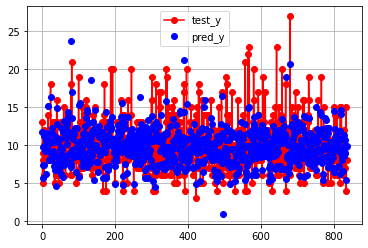

In [35]:
plt.plot(test_y,'-o',color = 'red',label = 'test_y')
plt.plot(pred_y,'o',color = 'blue',label = 'pred_y')
plt.grid()
plt.legend()
plt.show()

In [38]:
#오차율 
acc = 1 - np.mean(np.abs((pred_y - test_y)/(test_y)))
print(acc)

0.8422528303173029
